In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from scipy.stats import ttest_ind
data = pd.read_csv ("dataset w7.csv")
print(data)

    Gender Test preparation  Total Marks
0     male             none           14
1   female             none           28
2   female             none           18
3   female             none           48
4   female             none           21
5   female        completed           40
6     male             none           30
7   female             none           12
8     male             none           18
9     male             none           24
10    male        completed           44
11    male             none           23
12    male        completed           43
13    male             none           28
14  female             none           41
15  female             none           13
16  female        completed           48
17  female             none           45
18    male             none           47
19    male             none           36
20    male             none           14
21    male        completed           44
22  female             none           41
23  female      

# Carry out descriptive analytics on the dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [5]:
data.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

No null values are found in given dataset.

In [7]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

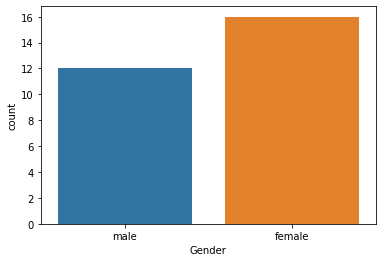

In [13]:
sns.countplot(data = data, x='Gender')

Number of females  are greater than male. 

C:\Users\VN582EN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

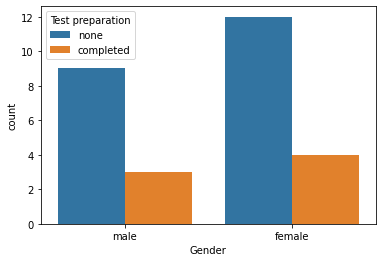

In [14]:
sns.countplot("Gender", data=data, hue = 'Test preparation')

From above graph, there are only few students whose test preparation status is completed.

# Check whether female and male students scored the same marks.

In [15]:
data_males = data[data["Gender"] == "male"][["Total Marks"]]
data_females = data[data["Gender"] == "female"][["Total Marks"]]

In [17]:
t_score, p_value = ttest_ind(data_females,data_males)
print("The calulated T score & p-value are : \n  \nt-score = %0.3f , \np-value = %0.3f \n" % (t_score, p_value))

alpha  = 0.05

if p_value > alpha:
    print("Failing to Reject the H0")
else:
    print(" Rejecting the H0")

The calulated T score & p-value are : 
  
t-score = 0.694 , 
p-value = 0.494 

Failing to Reject the H0





From the above assumption we can conclude that:

We're failing to Reject H0.

The Girls and Boys have scored similar marks

# Whether test preparation helps the students?

In [18]:
data_prep = data[data["Test preparation"] == "completed"][["Total Marks"]]
data_not_prep = data[data["Test preparation"] == "none"][["Total Marks"]]

In [20]:
t_score, p_val = ttest_ind(data_prep,data_not_prep, alternative="greater")
print("The calulated T score & p-value are : \n  \nt-score = %0.3f , \np-value = %0.3f \n" % (t_score, p_val))

alpha = 0.05 # The degree of Freedom is n-1, i.e. 28-1 = 27

if p_val < alpha:
    print("Rejecting the H0")
elif p_val > alpha:
    print("Failing to Reject the H0")

The calulated T score & p-value are : 
  
t-score = 3.614 , 
p-value = 0.001 

Rejecting the H0




From this study, we'll reject the H0. i.e. rejecting the claim that the test preparation didn't helped the students.

The test preparation has helped the students increase their score.